In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('data/stud.csv')

In [33]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [34]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [35]:
df.drop(columns=['math_score','reading_score','writing_score'],inplace=True)

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [37]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}")
print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental_level_of_education' variable: {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"Categories in 'test_preparation_course' variable: {df['test_preparation_course'].unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [38]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333


In [39]:
y = df['total_score']
x = df.drop(columns=['total_score'])

In [40]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,avg_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [41]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [42]:
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_trans = StandardScaler()
one_hot = OneHotEncoder()

preproseccor = ColumnTransformer(
    [
        ("onehotencoder",one_hot,cat_feature),
        ("standard_sclar",numeric_trans,num_feature)
    ]


)




In [43]:
x = preproseccor.fit_transform(x)

In [44]:
x.shape

(1000, 18)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape

((800, 18), (200, 18))

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [49]:
def evaluate(true_value,pred_value):
    mae = mean_absolute_error(true_value, pred_value)
    mse = mean_squared_error(true_value, pred_value)
    rmse = np.sqrt(mean_squared_error(true_value, pred_value))
    r2_square = r2_score(true_value, pred_value)
    return mae, rmse, r2_square

In [58]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "SVR":SVR(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0623
- Mean Absolute Error: 0.0507
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0684
- Mean Absolute Error: 0.0536
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 12.2591
- Mean Absolute Error: 9.3290
- R2 Score: 0.9163
----------------------

In [59]:
df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['model_name', 'r2_score'])

# Sort the DataFrame by 'r2_score' in descending order
df_sorted = df.sort_values(by='r2_score', ascending=False)

# Display the sorted DataFrame
df_sorted

,model_name,r2_score
0,Linear Regression,1.000000
2,Ridge,0.999998
1,Lasso,0.999422
6,XGBRegressor,0.997708
4,Decision Tree,0.997634
5,Random Forest Regressor,0.996032
8,AdaBoost Regressor,0.990815
3,K-Neighbors Regressor,0.879285
7,SVR,0.774682


In [60]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)

In [65]:
evaluate(y_test,y_pred)

(np.float64(1.6981971384666395e-14), np.float64(2.6068301405990925e-14), 1.0)

In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,-2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,-2.842171e-14
411,245,245.0,0.000000e+00
...,...,...,...
408,165,165.0,-2.842171e-14
332,171,171.0,-2.842171e-14
208,231,231.0,0.000000e+00
613,216,216.0,0.000000e+00


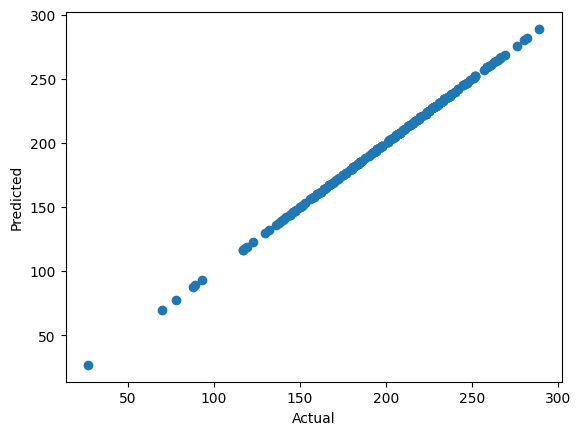

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')